# Titanic Survival Perdiction 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
cf.go_offline()

# Get rid of scientific notation (e) while displaying numbers in a data frame
pd.options.display.float_format = '{:.3f}'.format

# set plot style
sns.set_style('whitegrid')

## Reading Data

In [2]:
# Read in titanic_train.csv file and set it to a data frame called train.
df = pd.read_csv('titanic_train.csv')

# Check the head of train
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [3]:
print("Number of data points in data", df.shape)
print('-'*50)
print("The attributes of data :", df.columns.values)

Number of data points in data (891, 12)
--------------------------------------------------
The attributes of data : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Understanding Data

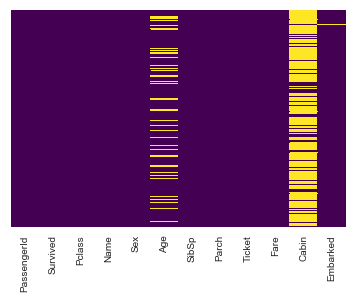

In [4]:
# Create the heatmap of the dataset that differenciates rows with null values from rows with non-null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

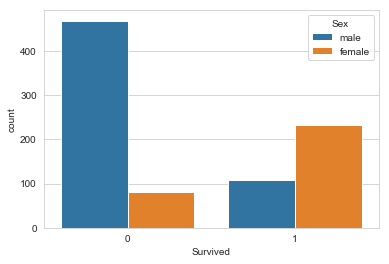

In [5]:
# Create count plot of the Survived column with respect to the passenger gender
sns.countplot(x='Survived',hue ='Sex',data=df)
plt.show()

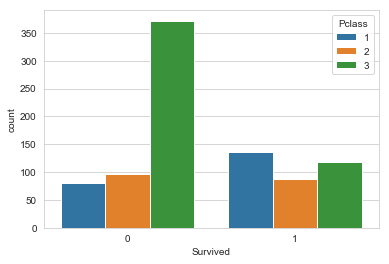

In [6]:
# Create the countplot of the Survived column with respect to the passenger class
sns.countplot(x='Survived',hue ='Pclass',data=df)
plt.show()

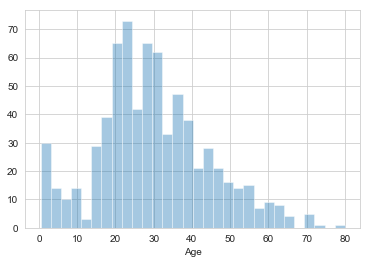

In [7]:
# Create a ditplot that show the age distibution of the passengers
sns.distplot(df['Age'].dropna(), kde=False, bins=30)
plt.show()

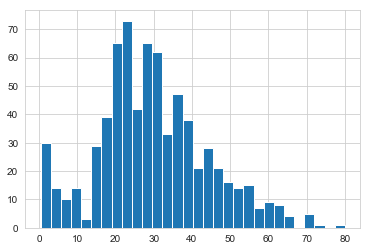

In [8]:
df['Age'].hist(bins=30)
plt.show()

In [9]:
# Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


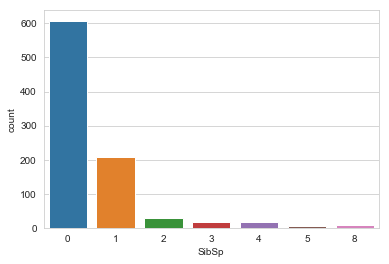

In [10]:
# Create the countplot the shows the number of Siblings/Spouses Aboard
sns.countplot(x='SibSp',data=df)
plt.show()

In [11]:
# Create a histogram Fare column using Chufflinks
df['Fare'].iplot(kind='hist', bins=30)

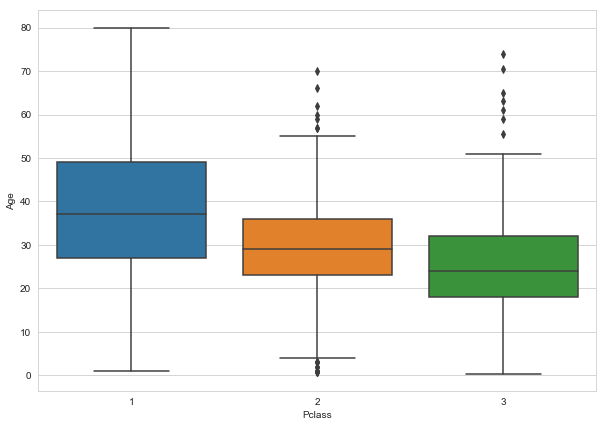

In [12]:
# Create a Box-Plot of the 'Pclass' and 'Age' columns
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

## Data Preprocessing

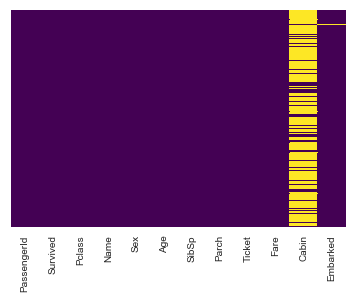

In [13]:
# Write an appropriate function to fill null rows of the Age column with average age of the each paseenger class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# Apply function to the dataframe
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

# Create the heatmap of the dataset that differenciates rows with null values from rows with non-null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

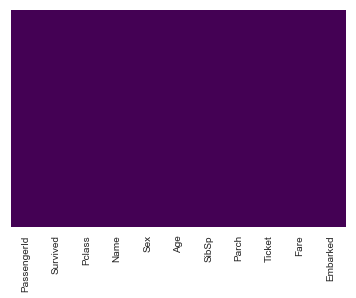

In [14]:
# Beacuse it is impossible to do some feature engineering on Cabin column to fill null values, we need to drop it
df.drop('Cabin', axis=1, inplace=True)

# Just two rows remained with null values after all operations, let's drop those rows 
df.dropna(inplace=True)

# Create the heatmap of the dataset that differenciates rows with null values from rows with non-null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [15]:
# In order to be able to fit our data to the model, we need to have a numeric value in all columns
# Create a dataframe with converting Sex column into dummy variables with dropping first one of the genders
sex = pd.get_dummies(df['Sex'], drop_first=True)

# Create a dataframe with converting Embarked column into dummy variables with dropping first one of the embarkation places
embark = pd.get_dummies(df['Embarked'], drop_first=True)

# Create a dataframe with converting Pclass column into dummy variables with dropping first one of the passenger classes
pclass = pd.get_dummies(df['Pclass'],drop_first=True)

# Concatenate new dataframes with main dataframe
df = pd.concat([df,sex,embark, pclass], axis=1)

# Display the head of the new version the main dataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S,1,0,1,0,1


In [16]:
# Drop unnecessray columns
df.drop(['Sex','Embarked','Name','Ticket', 'PassengerId', 'Pclass'], axis=1, inplace=True)

# Display the head of the last version of the main file
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.000,1,0,7.250,1,0,1,0,1
1,1,38.000,1,0,71.283,0,0,0,0,0
2,1,26.000,0,0,7.925,0,0,1,0,1
3,1,35.000,1,0,53.100,0,0,1,0,0
4,0,35.000,0,0,8.050,1,0,1,0,1


## Preparing our data for the models and splitting data into train and cv(or test)

In [17]:
#Splitting Data into train and Test sklearn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train_main, X_test, y_train_main, y_test = train_test_split(df.drop("Survived",axis=1), df['Survived'], test_size = 0.20)

## Feature Scaling

In [18]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
X_train_main = r_scaler.fit_transform(X_train_main)
X_test = r_scaler.transform(X_test)

# 1. K-NN

##### Model Tuning

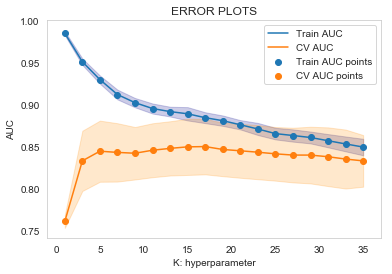

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV
neigh = KNeighborsClassifier()
parameters ={'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]}
model1=GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model1.fit(X_train_main, y_train_main);

train_auc= model1.cv_results_['mean_train_score']
train_auc_std= model1.cv_results_['std_train_score']
cv_auc = model1.cv_results_['mean_test_score'] 
cv_auc_std= model1.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [20]:
K = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
scor = [x for x in cv_auc]
best_K = K[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding k value of cv is:",best_K, '\n')

print("Best k for the model is: ", best_K)

Maximum AUC score of cv is: 0.8499743417597101
Corresponding k value of cv is: 17 

Best k for the model is:  17


##### Measuring AUC Score for Test Data

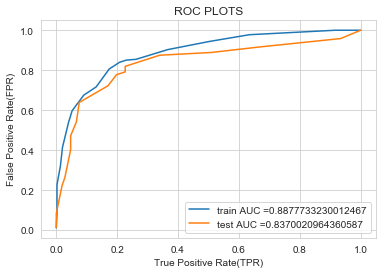

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model1 = KNeighborsClassifier(n_neighbors=best_K,algorithm='brute')
model1.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model1.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

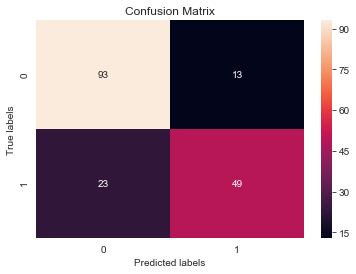

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()

def predict(proba,threshold,fpr,tpr):
    t=threshold[np.argmax(fpr*(1-tpr))]
    print("the maximun value of tpr*(1-fpr)",np.round(max(tpr*(1-fpr)),2) ,"for threshold",np.round(t,2))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


sns.heatmap(confusion_matrix(y_test, model1.predict(X_test)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classsification Report

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84       106
          1       0.79      0.68      0.73        72

avg / total       0.80      0.80      0.79       178



# 2. Logistic Regression

##### Model Tuning

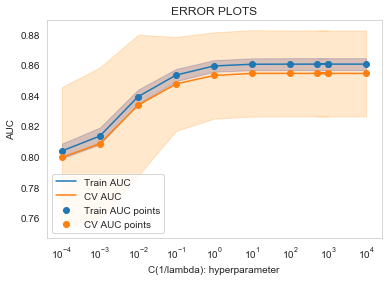

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression();
parameters ={'C':[10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]}
model2=GridSearchCV(lr, parameters, cv=10, scoring='roc_auc',return_train_score=True)
model2.fit(X_train_main, y_train_main)

train_auc= model2.cv_results_['mean_train_score']
train_auc_std= model2.cv_results_['std_train_score']
cv_auc = model2.cv_results_['mean_test_score'] 
cv_auc_std= model2.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [25]:
C = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_C = C[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding C value of cv is:",best_C, '\n')

print("Best C for the Model is: ", best_C)

Maximum AUC score of cv is: 0.8543814574756908
Corresponding C value of cv is: 10 

Best C for the Model is:  10


##### Measuring AUC Score for Test Data

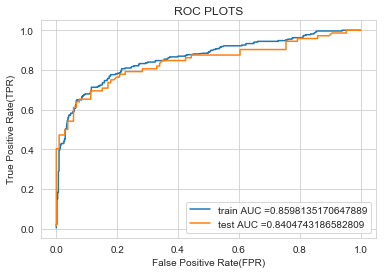

In [26]:
from sklearn.metrics import roc_curve, auc

model2 = LogisticRegression(C=best_C);
model2.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model2.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

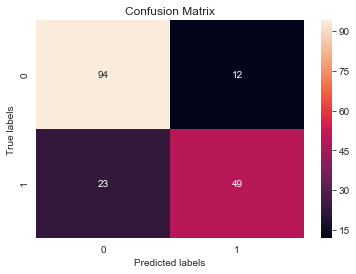

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model2.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.80      0.89      0.84       106
          1       0.80      0.68      0.74        72

avg / total       0.80      0.80      0.80       178



# 3. Decision Tree

###### Model Tuning

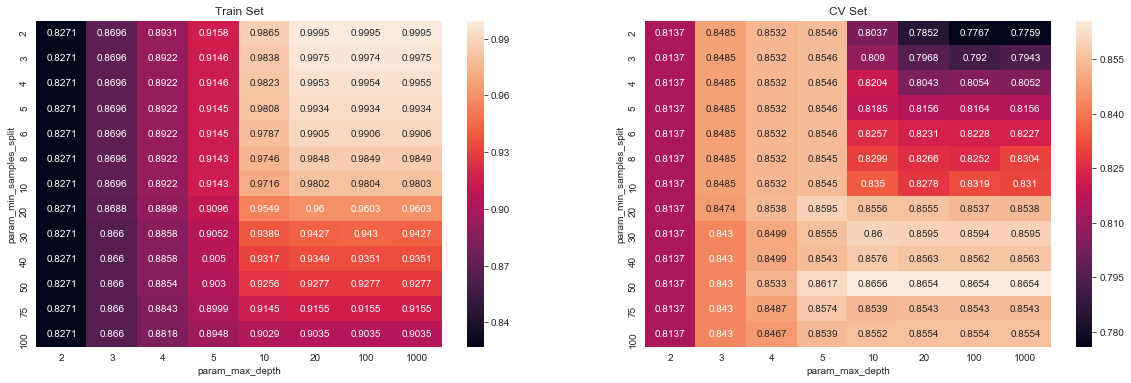

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [2,3,4,5,10,20,100, 1000], 'min_samples_split': [2,3,4,5,6,8, 10,20,30,40,50,75, 100]}
model3 = GridSearchCV(dt, parameters, cv=10, scoring='roc_auc',return_train_score=True)
model3.fit(X_train_main, y_train_main)

max_scores1 = pd.DataFrame(model3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [30]:
print(model3.best_params_)

{'max_depth': 10, 'min_samples_split': 50}


##### Measuring AUC Score for Test Data

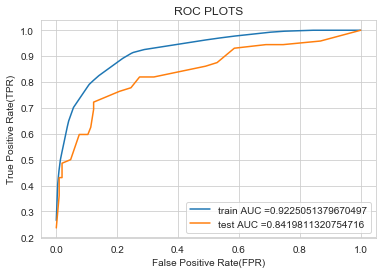

In [31]:
model3 = DecisionTreeClassifier(**model3.best_params_)
model3.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model3.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

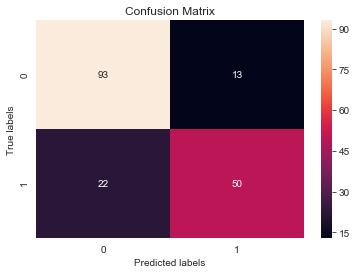

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model3.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model3.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84       106
          1       0.79      0.69      0.74        72

avg / total       0.80      0.80      0.80       178



# 4. SVM

### L2 Regularization

##### Model Tuning

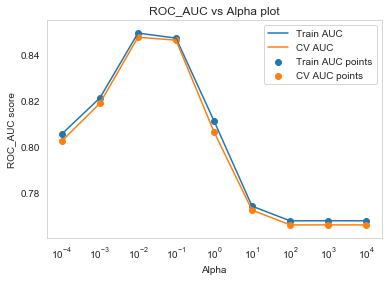

In [34]:
from sklearn.linear_model import SGDClassifier

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sgdc = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
model4 = GridSearchCV(sgdc, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
model4.fit(X_train_main, y_train_main)

train_auc = model4.cv_results_['mean_train_score']
cv_auc= model4.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

In [35]:
alpha = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_alpha = alpha[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding alpha value of cv is:",best_alpha, '\n')

print("Best alpha for the model is: ", best_alpha)

Maximum AUC score of cv is: 0.8472894584708931
Corresponding alpha value of cv is: 0.01 

Best alpha for the model is:  0.01


##### Measuring AUC Score for Test Data

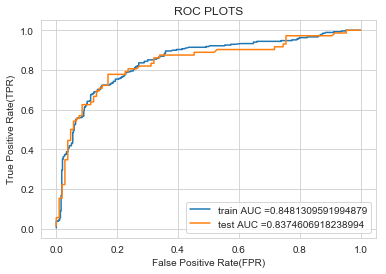

In [36]:
model4 = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced', alpha = best_alpha)
model4.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model4.decision_function(X_train_main)
y_test_pred = model4.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_main, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

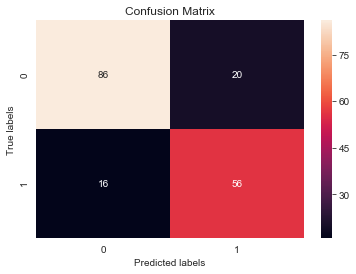

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model4.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model4.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      0.81      0.83       106
          1       0.74      0.78      0.76        72

avg / total       0.80      0.80      0.80       178



### L1 Regularization

##### Model Tuning

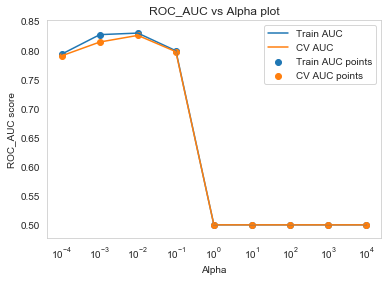

In [39]:
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sgdc = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
model5 = GridSearchCV(sgdc, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
model5.fit(X_train_main, y_train_main)
train_auc = model5.cv_results_['mean_train_score']
cv_auc= model5.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

In [40]:
alpha = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_alpha = alpha[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding alpha value of cv is:",best_alpha, '\n')

print("Best alpha for the model is: ", best_alpha)

Maximum AUC score of cv is: 0.8251830304924539
Corresponding alpha value of cv is: 0.01 

Best alpha for the model is:  0.01


##### Measuring AUC Score for Test Data

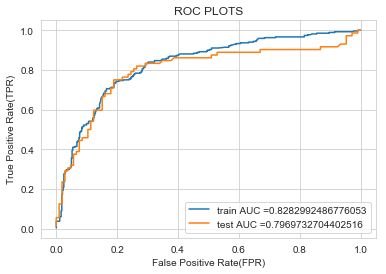

In [41]:
model5 = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced', alpha = best_alpha)
model5.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model5.decision_function(X_train_main)
y_test_pred = model5.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_main, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

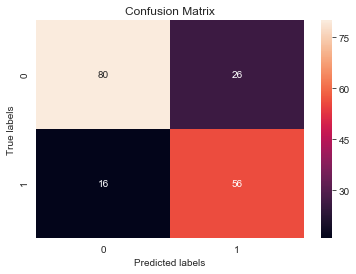

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model5.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model5.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.75      0.79       106
          1       0.68      0.78      0.73        72

avg / total       0.77      0.76      0.77       178



# 5. Random Forest

##### Model Tuning

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
parameters = {'n_estimators': [300], 'max_depth': [2, 5, 10, 20, None], "max_features": [2,5],
              'min_samples_split': [2, 5, 10]}
model6 = GridSearchCV(rf, parameters, cv=4, scoring='roc_auc',return_train_score=True)
model6.fit(X_train_main, y_train_main)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300], 'max_depth': [2, 5, 10, 20, None], 'max_features': [2, 5], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [45]:
print(model6.best_params_)

{'max_depth': None, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 300}


##### Measuring AUC Score for Test Data

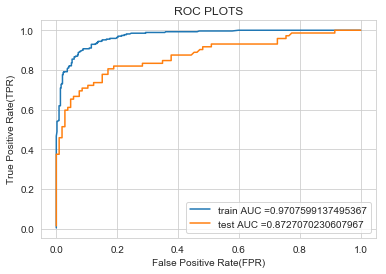

In [46]:
model6 = RandomForestClassifier(**model6.best_params_)
model6.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model6.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model6.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

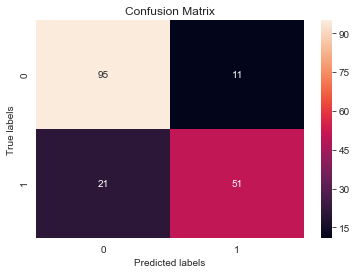

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model6.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model6.predict(X_test)))

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       106
          1       0.82      0.71      0.76        72

avg / total       0.82      0.82      0.82       178



# 6. Gradient Boosting

##### Model Tuning

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
parameters = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [2,5,10],
             "n_estimators": [500],
             "subsample": [1,0.5,0.8]}

model7 = GridSearchCV(gb_model, parameters, cv=4, scoring='roc_auc',return_train_score=True)
model7.fit(X_train_main, y_train_main)

GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.1, 0.01], 'max_depth': [2, 5, 10], 'n_estimators': [500], 'subsample': [1, 0.5, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [50]:
print(model7.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}


##### Measuring AUC Score for Test Data

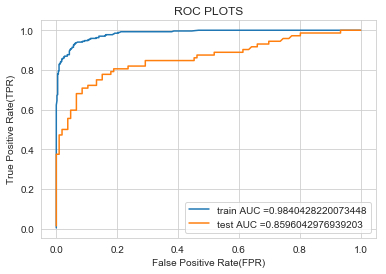

In [51]:
model7 = GradientBoostingClassifier(**model7.best_params_)
model7.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model7.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model7.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

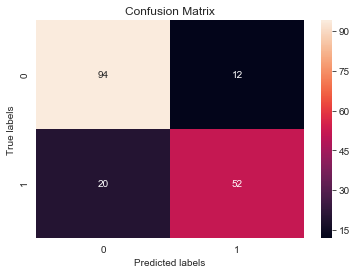

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model7.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model7.predict(X_test)))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       106
          1       0.81      0.72      0.76        72

avg / total       0.82      0.82      0.82       178



# 7. Light GBM

##### Model Tuning 

In [54]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()
parameters = {"learning_rate": [0.01, 0.05, 0.1],
              "n_estimators": [800],
              "max_depth":[5,8,10],
              "colsample_bytree": [1,0.5,0.3]}

model8 = GridSearchCV(lgbm_model, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model8.fit(X_train_main, y_train_main)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [800], 'max_depth': [5, 8, 10], 'colsample_bytree': [1, 0.5, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [55]:
print(model8.best_params_)

{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 800}


##### Measuring AUC Score for Test Data

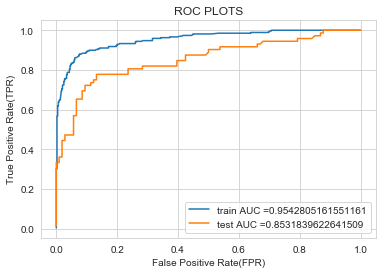

In [56]:
model8 = LGBMClassifier(**model8.best_params_)
model8.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model8.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model8.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



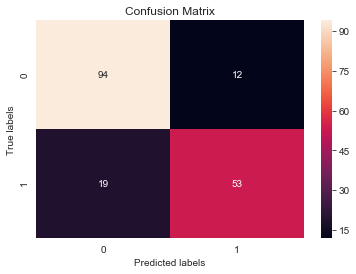

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model8.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model8.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       106
          1       0.82      0.74      0.77        72

avg / total       0.83      0.83      0.82       178



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



# 8. XGBoost

##### Model Tuning

In [59]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
parameters = {"learning_rate": [0.1,0.01,1],
             "max_depth": [2,5,8],
             "n_estimators": [800],
             "colsample_bytree": [0.3,0.6,1]}

model9 = GridSearchCV(xgb_model, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model9.fit(X_train_main, y_train_main)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.01, 1], 'max_depth': [2, 5, 8], 'n_estimators': [800], 'colsample_bytree': [0.3, 0.6, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [60]:
print(model9.best_params_)

{'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800}


##### Measuring AUC Score for Test Data

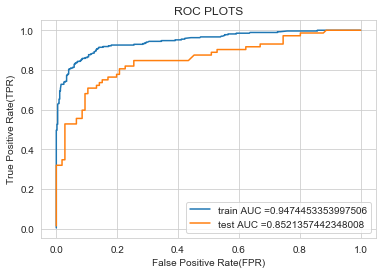

In [61]:
model9 = XGBClassifier(**model9.best_params_)
model9.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model9.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model9.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



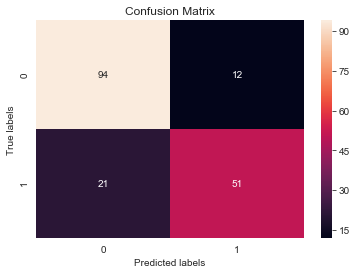

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model9.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model9.predict(X_test)))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       106
          1       0.81      0.71      0.76        72

avg / total       0.81      0.81      0.81       178



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



# Conclusion

In [1]:
# Compare all models using Prettytable library
# how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("Model", "AUC Score", "Recall Score", "F1 Score")
tb.add_row(["KNN", "0.837", "0.68", "0.73"])
tb.add_row(["Logistic Regression", "0.840", "0.68", "0.74"])
tb.add_row(["Decision Tree", "0.841", "0.69", "0.74"])
tb.add_row(["SVM - L2 Regularization", "0.837", "0.78", "0.76"])
tb.add_row(["SVM - L1 Regularization", "0.796", "0.78", "0.73"])
tb.add_row(["Random Forest", "0.872", "0.71", "0.76"])
tb.add_row(["Gradient Boosting", "0.859", "0.72", "0.76"])
tb.add_row(["Light GBM", "0.853", "0.74", "0.77"])
tb.add_row(["XGBoost", "0.852", "0.71", "0.76"])

print(tb)

+-------------------------+-----------+--------------+----------+
|          Model          | AUC Score | Recall Score | F1 Score |
+-------------------------+-----------+--------------+----------+
|           KNN           |   0.837   |     0.68     |   0.73   |
|   Logistic Regression   |   0.840   |     0.68     |   0.74   |
|      Decision Tree      |   0.841   |     0.69     |   0.74   |
| SVM - L2 Regularization |   0.837   |     0.78     |   0.76   |
| SVM - L1 Regularization |   0.796   |     0.78     |   0.73   |
|      Random Forest      |   0.872   |     0.71     |   0.76   |
|    Gradient Boosting    |   0.859   |     0.72     |   0.76   |
|        Light GBM        |   0.853   |     0.74     |   0.77   |
|         XGBoost         |   0.852   |     0.71     |   0.76   |
+-------------------------+-----------+--------------+----------+
